<a href="https://colab.research.google.com/github/vaibhavi128/Pytorch-deep-learning/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


100%|██████████| 26421880/26421880 [00:02<00:00, 11735642.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203763.50it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1160336.43it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9814671.36it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
#see first training sample
image , label = test_data[0]
image,label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
#shape of image
image.shape

torch.Size([1, 28, 28])

In [ ]:
#how many samples are there? data=input targets=output
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
#see classes
classes_names=train_data.classes
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


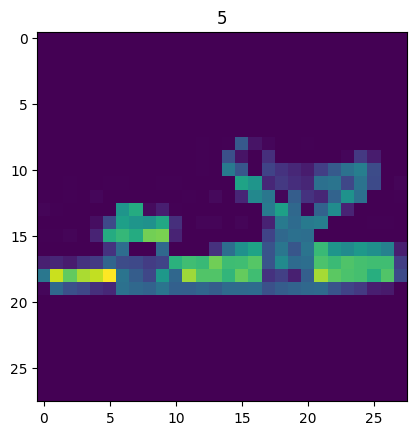

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[59999]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())#image shape is [1,28,28] (color channel,height )
plt.title(label);

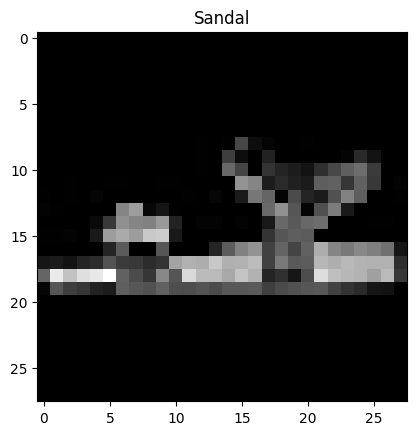

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(classes_names[label]);

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
#turn dateset in iterable
train_dataloader=DataLoader(train_data,#dataset to turn into interable
                            batch_size=BATCH_SIZE,#how many sample per batch
                            shuffle=True)

test_dataloader=DataLoader(test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)
print(f"dataloader : {train_dataloader,test_dataloader}")
print(f"length of train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")


dataloader : (<torch.utils.data.dataloader.DataLoader object at 0x7e55f62c21a0>, <torch.utils.data.dataloader.DataLoader object at 0x7e55f62c22f0>)
length of train dataloader : 1875 batches of 32
length of test dataloader : 313 batches of 32


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(input_shape=784,#one for ecery pixel(28 *28) 1*28*28=784
                            hidden_units=10,
                            output_shape=len(classes_names))
model_0.to("cpu")


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_loss=0
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred=model_0(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss/=len(train_dataloader)

    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            test_pred=model_0(X)
            test_loss+=loss_fn(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
        print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47643 | Test loss: 0.48304 | Test acc: 82.99%
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45340 | Test loss: 0.51319 | Test acc: 82.35%
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.44233 | Test loss: 0.51023 | Test acc: 82.99%
